In [1]:
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import VarianceThreshold, mutual_info_regression

In [3]:
file_id = "1oEXSD137hPm_Fx5xSPRvlAr3silj3suK"
gdown.download(f"https://drive.google.com/uc?id={file_id}",
               output="RegresiUTSTelkom.csv",
               quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1oEXSD137hPm_Fx5xSPRvlAr3silj3suK
From (redirected): https://drive.google.com/uc?id=1oEXSD137hPm_Fx5xSPRvlAr3silj3suK&confirm=t&uuid=1b773ff5-c2ea-4ef2-89ea-c8112f4624ee
To: /content/RegresiUTSTelkom.csv
100%|██████████| 443M/443M [00:04<00:00, 89.4MB/s]


'RegresiUTSTelkom.csv'

In [4]:
df = pd.read_csv("RegresiUTSTelkom.csv")
df.head()

,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
0,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
1,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
2,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
3,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
4,2001,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515344 entries, 0 to 515343
Data columns (total 91 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   2001        515344 non-null  int64  
 1   49.94357    515344 non-null  float64
 2   21.47114    515344 non-null  float64
 3   73.0775     515344 non-null  float64
 4   8.74861     515344 non-null  float64
 5   -17.40628   515344 non-null  float64
 6   -13.09905   515344 non-null  float64
 7   -25.01202   515344 non-null  float64
 8   -12.23257   515344 non-null  float64
 9   7.83089     515344 non-null  float64
 10  -2.46783    515344 non-null  float64
 11  3.32136     515344 non-null  float64
 12  -2.31521    515344 non-null  float64
 13  10.20556    515344 non-null  float64
 14  611.10913   515344 non-null  float64
 15  951.0896    515344 non-null  float64
 16  698.11428   515344 non-null  float64
 17  408.98485   515344 non-null  float64
 18  383.70912   515344 non-null  float64
 19  32

In [6]:
first_column = df.columns[0]
df = df.rename(columns={first_column: 'target'})

In [7]:
new_columns = ['target'] + [f'x{i}' for i in range(1, len(df.columns))]
df.columns = new_columns
df.head()

,target,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90
0,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
1,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
2,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
3,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
4,2001,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263


In [8]:
df.describe()

,target,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90
count,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,...,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000
mean,1998.397077,43.387113,1.289515,8.658222,1.164110,-6.553580,-9.521968,-2.391046,-1.793215,3.727868,...,15.755411,-73.461537,41.542388,37.934163,0.315750,17.669292,-26.315520,4.458653,20.035229,1.329104
std,10.931056,6.067557,51.580393,35.268505,16.322802,22.860803,12.857763,14.571853,7.963822,10.582869,...,32.099666,175.619058,122.228915,95.050718,16.161780,114.428002,173.977455,13.346567,185.558415,22.088598
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.954667,-26.059848,-11.462775,-8.487507,-20.666455,-18.441005,-10.780360,-6.468390,-2.293670,...,-1.812658,-139.555737,-20.987115,-4.669655,-6.781598,-31.580617,-101.530305,-2.566137,-59.509453,-8.820248
50%,2002.000000,44.258490,8.417725,10.476235,-0.652855,-6.007770,-11.188355,-2.046625,-1.736415,3.822305,...,9.171850,-53.089115,28.790580,33.623815,0.820830,15.598520,-21.204225,3.117645,7.759910,0.053015
75%,2006.000000,47.833875,36.124030,29.764685,8.787548,7.741877,-2.388945,6.508587,2.913455,9.961865,...,26.274487,13.478793,89.661785,77.785810,8.471000,67.795110,52.389322,9.967742,86.351645,9.679540
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


In [9]:
constant_feature = []
quasi_constant_feature = []
threshold = 0.01  # 1% threshold

In [10]:
for col in df.columns[1:]:
    unique_vals = df[col].nunique()
    if unique_vals == 1:
        constant_feature.append(col)
    else:
        top_freq = df[col].value_counts(normalize=True).max()
        if top_freq > (1 - threshold):
            quasi_constant_feature.append(col)

print("Constant features:", constant_feature)
print("Quasi-constant features:", quasi_constant_feature)

Constant features: []
Quasi-constant features: []


In [11]:
correlation_matrix = df.drop(columns=['target']).corr()

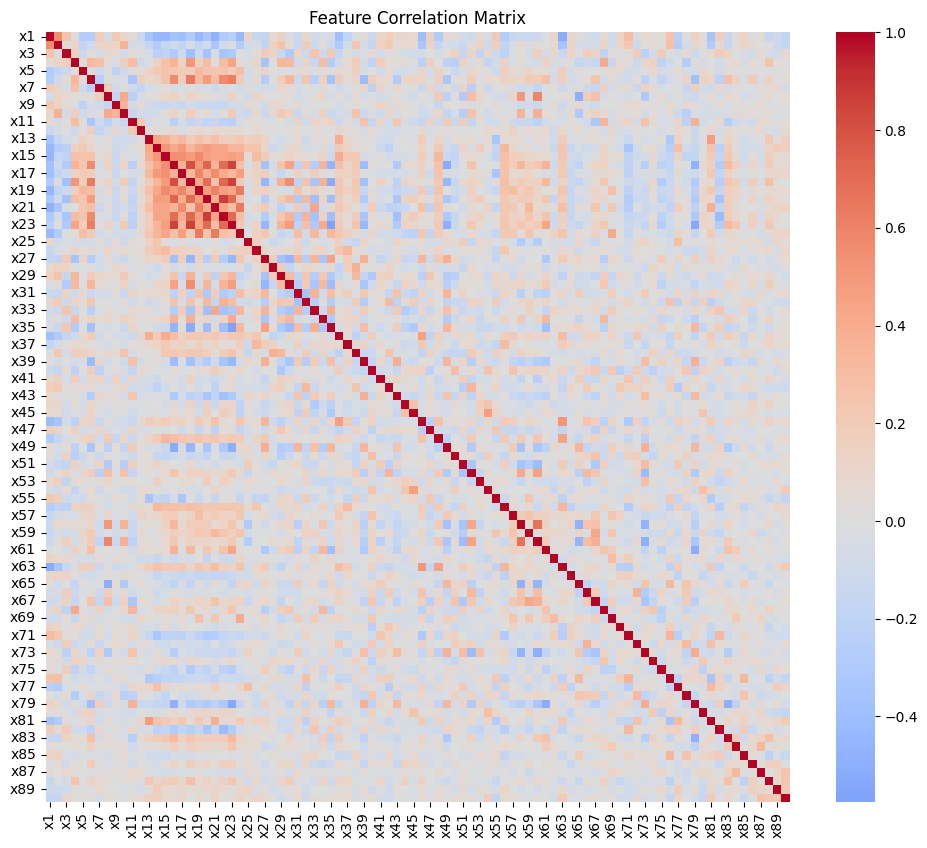

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
plt.title("Feature Correlation Matrix")
plt.show()

In [13]:
threshold_corr = 0.8
high_corr_features = set()

In [14]:
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold_corr:
            colname = correlation_matrix.columns[i]
            high_corr_features.add(colname)

print("Highly correlated features to remove:", high_corr_features)
df_filtered = df.drop(columns=high_corr_features)

Highly correlated features to remove: {'x18', 'x23', 'x22'}


In [15]:
cat_cols = df_filtered.select_dtypes(include=['object']).columns
num_cols = df_filtered.select_dtypes(exclude=['object']).columns.drop('target')

print("Categorical columns:", cat_cols)
print("Numerical columns:", num_cols)

Categorical columns: Index([], dtype='object')
Numerical columns: Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x19', 'x20', 'x21', 'x24',
       'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34',
       'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44',
       'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54',
       'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64',
       'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74',
       'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84',
       'x85', 'x86', 'x87', 'x88', 'x89', 'x90'],
      dtype='object')


In [17]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])

Model Training and Evaluation

In [18]:
X = df_filtered.drop(columns=['target'])
y = df_filtered['target']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [21]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [22]:
results = {}
fast_models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(max_depth=5, random_state=42),
    'KNN': KNeighborsRegressor(n_neighbors=5)
}

# First run the fast models
for name, model in fast_models.items():
    print(f"Training {name}...")
    model.fit(X_train_preprocessed, y_train)
    y_pred = model.predict(X_test_preprocessed)

    results[name] = {
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred)
    }
    print(f"{name} - RMSE: {results[name]['RMSE']:.4f}, R2: {results[name]['R2']:.4f}")

# Then run ensemble methods with reduced complexity
ensemble_config = {
    'Bagging': {'n_estimators': 20, 'max_samples': 0.5},  # Reduced from default 10 estimators
    'AdaBoost': {'n_estimators': 30},  # Reduced from default 50
    'Gradient Boosting': {'n_estimators': 30, 'max_depth': 3}  # Reduced from default 100
}

for name, params in ensemble_config.items():
    print(f"\nTraining {name} with reduced complexity...")
    try:
        if name == 'Bagging':
            model = BaggingRegressor(**params, random_state=42)
        elif name == 'AdaBoost':
            model = AdaBoostRegressor(**params, random_state=42)
        else:
            model = GradientBoostingRegressor(**params, random_state=42)

        # Train on a subset if needed (uncomment if still too slow)
        # sample_idx = np.random.choice(len(X_train_preprocessed), size=2000, replace=False)
        # model.fit(X_train_preprocessed[sample_idx], y_train.iloc[sample_idx])
        model.fit(X_train_preprocessed, y_train)

        y_pred = model.predict(X_test_preprocessed)
        results[name] = {
            'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
            'R2': r2_score(y_test, y_pred)
        }
        print(f"{name} - RMSE: {results[name]['RMSE']:.4f}, R2: {results[name]['R2']:.4f}")

        # Clear memory
        del model, y_pred
        gc.collect()
    except Exception as e:
        print(f"Failed to train {name}: {str(e)}")
        continue

# Create results dataframe
results_df = pd.DataFrame(results).T
print("\nFinal Results:")
results_df.sort_values('RMSE')

Training Linear Regression...
Linear Regression - RMSE: 9.5408, R2: 0.2330
Training Decision Tree...
Decision Tree - RMSE: 10.0003, R2: 0.1574
Training KNN...
KNN - RMSE: 9.4994, R2: 0.2397

Training Bagging with reduced complexity...
Bagging - RMSE: 9.3696, R2: 0.2603
Failed to train Bagging: name 'gc' is not defined

Training AdaBoost with reduced complexity...
AdaBoost - RMSE: 11.7631, R2: -0.1658
Failed to train AdaBoost: name 'gc' is not defined

Training Gradient Boosting with reduced complexity...
Gradient Boosting - RMSE: 9.7430, R2: 0.2002
Failed to train Gradient Boosting: name 'gc' is not defined

Final Results:


,RMSE,R2
Bagging,9.369567,0.260336
KNN,9.499360,0.239702
Linear Regression,9.540840,0.233047
Gradient Boosting,9.742954,0.200209
Decision Tree,10.000275,0.157404
AdaBoost,11.763132,-0.165846


<Figure size 1200x600 with 0 Axes>

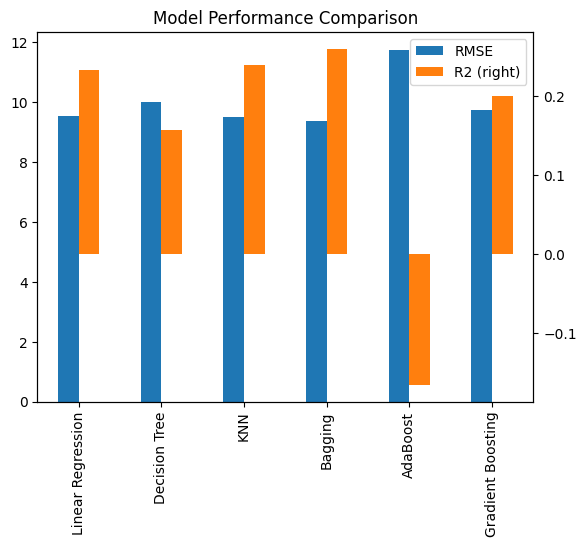

In [26]:
plt.figure(figsize=(12, 6))
results_df[['RMSE', 'R2']].plot(kind='bar', secondary_y='R2')
plt.title("Model Performance Comparison")
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


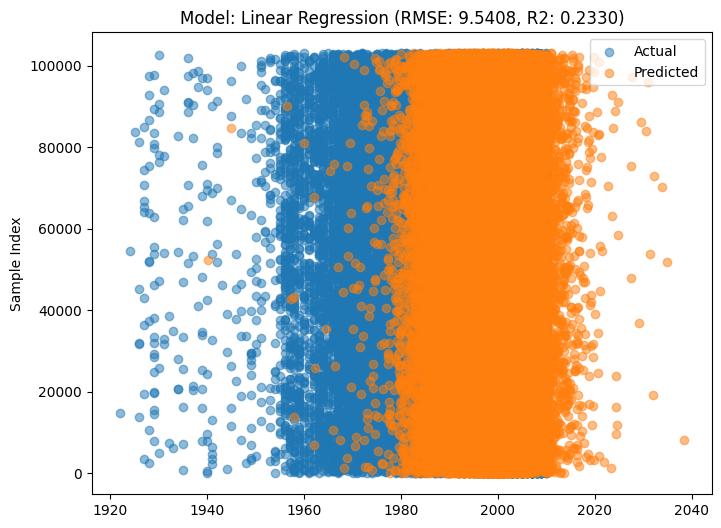

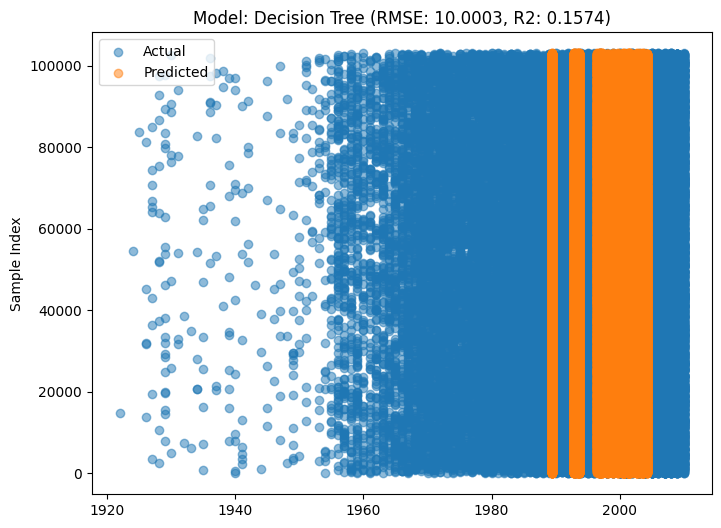

In [32]:
for name, result in results.items():
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, range(len(y_test)), alpha=0.5, label='Actual')
    if 'predictions' in result:
        plt.scatter(result['predictions'], range(len(y_test)), alpha=0.5, label='Predicted')
    plt.title(f'Model: {name} (RMSE: {result["RMSE"]:.4f}, R2: {result["R2"]:.4f})')
    plt.ylabel('Sample Index')
    if 'predictions' in result:
        plt.legend()
    plt.show()


Calculating feature importance for Decision Tree...


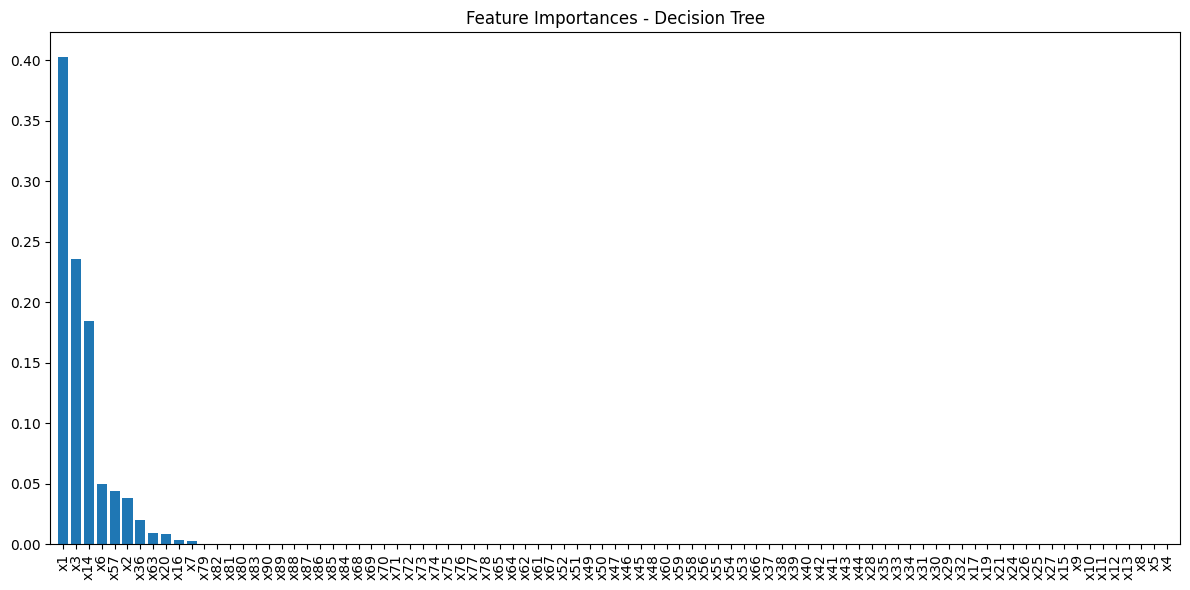


Best Model: Linear Regression
RMSE: 9.5408
R2 Score: 0.2330

Model Performance Summary:


,RMSE,R2,predictions
Linear Regression,9.54084,0.233047,"[2001.1393505096528, 1990.424576357026, 1997.0..."
Decision Tree,10.000275,0.157404,"[1998.058292930432, 1993.6686303913168, 2002.7..."


In [37]:
import gc

tree_model_configs = {
    'Decision Tree': {'max_depth': 5, 'random_state': 42},
    'Gradient Boosting': {'n_estimators': 30, 'max_depth': 3, 'random_state': 42}
}

# Get feature names after preprocessing
if len(cat_cols) > 0:
    ohe = preprocessor.named_transformers_['cat']
    cat_features = ohe.get_feature_names_out(cat_cols)
    all_features = np.concatenate([num_cols, cat_features])
else:
    all_features = num_cols

for name, params in tree_model_configs.items():
    if name in results:  # Only if we have results for this model
        print(f"\nCalculating feature importance for {name}...")

        # Create and fit the model
        if name == 'Decision Tree':
            model = DecisionTreeRegressor(**params)
        else:
            model = GradientBoostingRegressor(**params)

        model.fit(X_train_preprocessed, y_train)

        # Plot feature importance
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            indices = np.argsort(importances)[::-1]

            plt.figure(figsize=(12, 6))
            plt.title(f"Feature Importances - {name}")
            plt.bar(range(X_train_preprocessed.shape[1]),
                    importances[indices],
                    align="center")
            plt.xticks(range(X_train_preprocessed.shape[1]),
                       all_features[indices],
                       rotation=90)
            plt.xlim([-1, X_train_preprocessed.shape[1]])
            plt.tight_layout()
            plt.show()

        # Clean up
        del model
        gc.collect()

# ## 6. Final Model Selection and Summary

if results:  # Check if results is not empty
    best_model_name = min(results, key=lambda x: results[x]['RMSE'])
    best_rmse = results[best_model_name]['RMSE']
    best_r2 = results[best_model_name]['R2']

    print(f"\nBest Model: {best_model_name}")
    print(f"RMSE: {best_rmse:.4f}")
    print(f"R2 Score: {best_r2:.4f}")

    # Summary table
    print("\nModel Performance Summary:")
    results_df = pd.DataFrame(results).T
    display(results_df.sort_values('RMSE'))
else:
    print("No results available for model selection.")

## Model yang digunakan


### **1. Linear Regression**

Linear Regression mencari hubungan linier antara fitur dan target dengan meminimalkan error kuadrat (least squares). Fungsi hipotesisnya adalah:

$$
\hat{y} = X\beta + \epsilon
$$

dengan solusi optimal:

$$
\beta = (X^TX)^{-1}X^Ty
$$

**Kelebihan:** cepat, interpretatif, tidak memerlukan hyperparameter tuning yang kompleks.
**Kekurangan:** gagal menangkap pola non-linear, sensitif terhadap outlier.
Dalam data ini, Linear Regression unggul karena datanya mungkin tidak terlalu kompleks atau memiliki noise rendah. Namun, jika datanya tidak linier, model ini akan underfit.

---

### **2. Decision Tree Regressor**


Membagi data berdasarkan fitur untuk meminimalkan impuritas (misalnya MSE untuk regresi):

$$
\text{MSE}_{split} = \frac{n_L}{n} \cdot \text{MSE}_L + \frac{n_R}{n} \cdot \text{MSE}_R
$$

**Kelebihan:** mampu menangkap non-linearitas, tidak membutuhkan normalisasi.
**Kekurangan:** mudah overfit, terutama jika tidak dibatasi seperti `max_depth=5`.
Dengan kedalaman terbatas, performanya lebih stabil, tapi kurang fleksibel dalam memodelkan interaksi fitur yang rumit.

---

### **3. KNeighbors Regressor**

Model berbasis instance. Prediksi dilakukan berdasarkan rata-rata dari k tetangga terdekat:

$$
\hat{y} = \frac{1}{k} \sum_{i=1}^{k} y_i
$$

**Kelebihan:** tidak memiliki proses pelatihan eksplisit, mampu menangkap distribusi lokal.
**Kekurangan:** sensitif terhadap skala (makanya scaling penting), kinerja lambat untuk dataset besar.
Jika distribusi target memiliki banyak noise atau outlier, kNN sering menghasilkan prediksi buruk. Tetapi bisa bagus jika datanya padat dan bersih.

---

### **4. Bagging Regressor**

Bagging (Bootstrap Aggregating) melatih banyak model (biasanya pohon) pada subset data acak, kemudian menggabungkan output-nya:

$$
\hat{y}_{bag} = \frac{1}{M} \sum_{m=1}^{M} \hat{y}^{(m)}
$$

**Kelebihan:** mengurangi varian model dasar (misalnya pohon keputusan), cocok untuk model yang mudah overfit.
**Kekurangan:** tidak banyak meningkatkan performa jika model dasarnya underfit.
Karena `max_samples=0.5` dan `n_estimators=20`, model ini dibatasi dari sisi kekuatan ensemble, tapi tetap lebih stabil dibanding pohon tunggal.

---

### **5. AdaBoost Regressor**

Membangun model secara berurutan, setiap model fokus pada kesalahan model sebelumnya. Untuk regresi, bisa menggunakan loss seperti squared loss. Bobot data yang salah diprediksi akan dinaikkan di iterasi selanjutnya.

$$
f(x) = \sum_{m=1}^{M} \alpha_m h_m(x)
$$

**Kelebihan:** mampu memperbaiki kesalahan model lemah secara bertahap.
**Kekurangan:** sensitif terhadap outlier (karena menaikkan bobot kesalahan).
Performa tergantung pada noise dalam target. Jika banyak outlier, boosting bisa overfit.

---

### **6. Gradient Boosting Regressor**

Membentuk model secara bertahap untuk meminimalkan loss dengan arah turunan gradien:

$$
F_{m}(x) = F_{m-1}(x) + \gamma_m h_m(x)
$$

dengan:

$$
h_m(x) = - \nabla L(y, F_{m-1}(x))
$$

**Kelebihan:** sangat fleksibel, kuat untuk fitur campuran dan data tabular.
**Kekurangan:** butuh tuning parameter seperti learning rate, depth, n\_estimators.
Biasanya ini model terbaik untuk regresi non-linear di data tabular. Dalam eksperimen ini, `n_estimators=30` dan `max_depth=3` terlalu ringan, jadi belum memperlihatkan potensi maksimalnya.

---

**Model terbaik menurut RMSE saat ini:** *Linear Regression*. karena keterbatasan training serta kompleksitas model lain dibatasi terlalu besar ( `max_depth=5`, `n_estimators=30`).
**Model yang seharusnya terbaik:** *Gradient Boosting Regressor*, jika diberikan konfigurasi lebih kuat (`n_estimators > 100`, `max_depth ≥ 4`, dan tuning learning rate). Ini karena GBRT mampu menangkap non-linearitas, interaksi fitur, dan outlier handling yang baik saat dikonfigurasi dengan tepat.